<a href="https://colab.research.google.com/github/rahil161190/Yulu-Case-Study/blob/main/Rahil_Yulu_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_raw = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089', sep=',')

In [ ]:
df_raw.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#Examine dataset structure, characteristics, and statistical summary.


## Datatypes

In [ ]:
df_raw.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


Insights

*   We can observe date time is object and we have to change this to datetime for better analysis




In [ ]:
df_raw.describe(include = 'object')

,datetime
count,10886
unique,10886
top,2012-12-19 23:00:00
freq,1


Converting datetime object to 'datetime'

In [ ]:
df_raw['datetime'] = pd.to_datetime(df_raw['datetime'])
df_raw.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df_raw['datetime'].dt.year.max(),df_raw['datetime'].dt.year.min(),df_raw['datetime'].dt.month.max(),df_raw['datetime'].dt.month.min()

(2012, 2011, 12, 1)

Insights
- Dataset is from January-2011 to December-2012 i.e 2 years

## Identify missing values and imputation if required

In [ ]:
pd.DataFrame(df_raw.isna().sum()/len(df_raw)*100).rename(columns = {0:'Missing_Percentage'})

,Missing_Percentage
datetime,0.0
season,0.0
holiday,0.0
workingday,0.0
weather,0.0
temp,0.0
atemp,0.0
humidity,0.0
windspeed,0.0
casual,0.0


## Duplicate rows

In [ ]:
df_raw[df_raw.duplicated()].count()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


Insights

*   No duplicate rows.
*   No null values.


In [ ]:
for i in df_raw.columns:
  print(i ,":",df_raw[i].nunique() )

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [ ]:
df = df_raw.copy()

## Conversion of categorical attributes to 'category'

In [ ]:
mapping_dict = {'season':{1:'Spring',2:'Summer',3:'Fall',4:'Winter'},'holiday':{1:'Yes',0:'No'},'workingday':{1:'Yes',0:'No'},'weather':{1:'Clear',2:'Cloudy',3:'Rain',4:'Heavy_Rain_Storm'}}
for i in mapping_dict.keys():
  df[i] = df[i].map(mapping_dict[i])

In [ ]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [ ]:
#changing "count" column to "Total_count"
df.rename(columns ={'count' : 'Total_count'},inplace = True)

In [ ]:
for i in df.select_dtypes(include =['object','category']).columns:
  print(i ,":",df[i].value_counts() )

season : season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64
holiday : holiday
No     10575
Yes      311
Name: count, dtype: int64
workingday : workingday
Yes    7412
No     3474
Name: count, dtype: int64
weather : weather
Clear               7192
Cloudy              2834
Rain                 859
Heavy_Rain_Storm       1
Name: count, dtype: int64


## Statistical Summary

In [ ]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,Total_count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


Insights

*   Average temp was 20.23 degree.
*   Average number of bike rented/session was 191.
*   Maximum number of bike rented /session was 977 and this was in december 2012.




In [ ]:
df.describe(include = 'object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,Winter,No,Yes,Clear
freq,2734,10575,7412,7192


Insights

*   Most of the days weather condition was clear i.e 7192




## Data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  object        
 2   holiday      10886 non-null  object        
 3   workingday   10886 non-null  object        
 4   weather      10886 non-null  object        
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  Total_count  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


## Data types

In [ ]:
df.dtypes

,0
datetime,datetime64[ns]
season,object
holiday,object
workingday,object
weather,object
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


## Data shape

In [ ]:
df.shape

(10886, 12)

Insights

*   Dataset has 10886 rows and 12 columns




# Check for Outliers and Treatment if required

In [ ]:
# checking outlier for numerical columns
df_num = df.select_dtypes(include = ['int64','float64'])

In [ ]:
df_num.head(5)

,temp,atemp,humidity,windspeed,casual,registered,Total_count
0,9.84,14.395,81,0.0,3,13,16
1,9.02,13.635,80,0.0,8,32,40
2,9.02,13.635,80,0.0,5,27,32
3,9.84,14.395,75,0.0,3,10,13
4,9.84,14.395,75,0.0,0,1,1


In [ ]:
df_num.describe()

,temp,atemp,humidity,windspeed,casual,registered,Total_count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


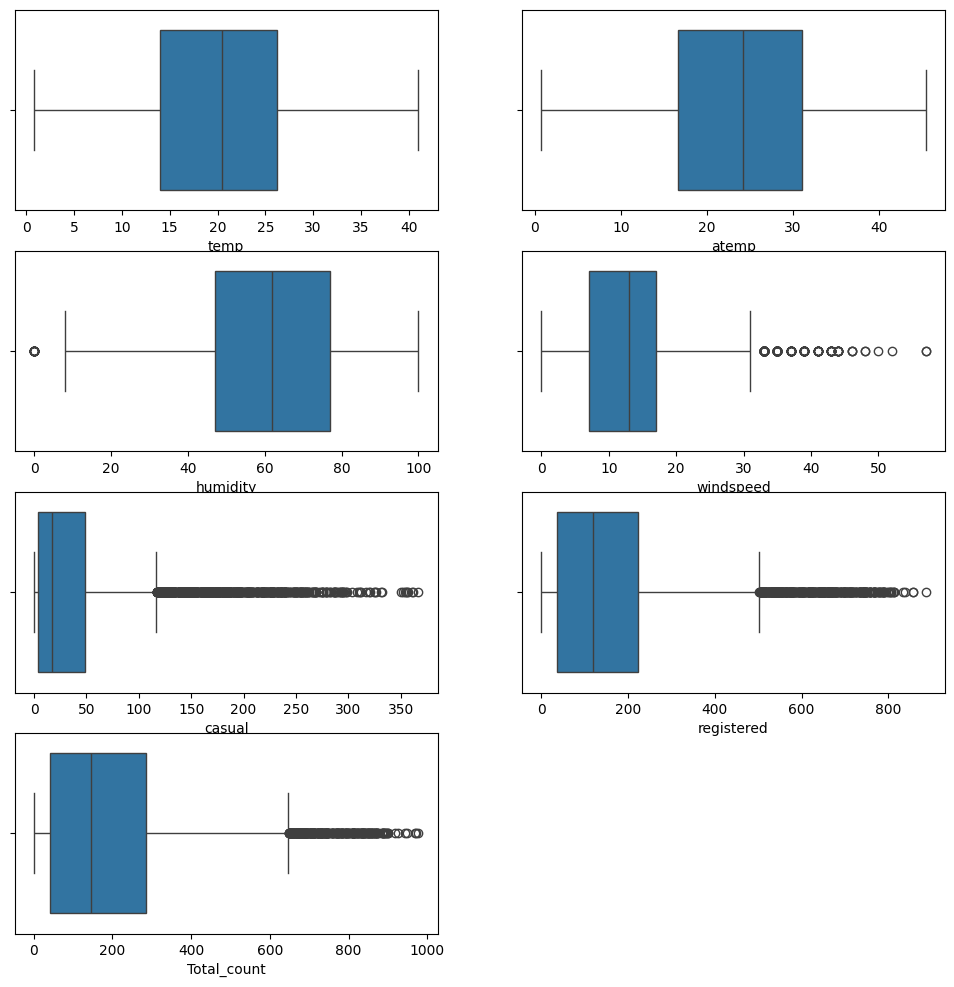

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(4,2,1)
sns.boxplot(x=df_num['temp'])

plt.subplot(4,2,2)
sns.boxplot(x=df_num['atemp'])

plt.subplot(4,2,3)
sns.boxplot(x=df_num['humidity'])

plt.subplot(4,2,4)
sns.boxplot(x=df_num['windspeed'])

plt.subplot(4,2,5)
sns.boxplot(x=df_num['casual'])
li
plt.subplot(4,2,6)
sns.boxplot(x=df_num['registered'])

plt.subplot(4,2,7)
sns.boxplot(x=df_num['Total_count'])

plt.show()

Insights

*   Mostly outliers are in casual,registered columns.




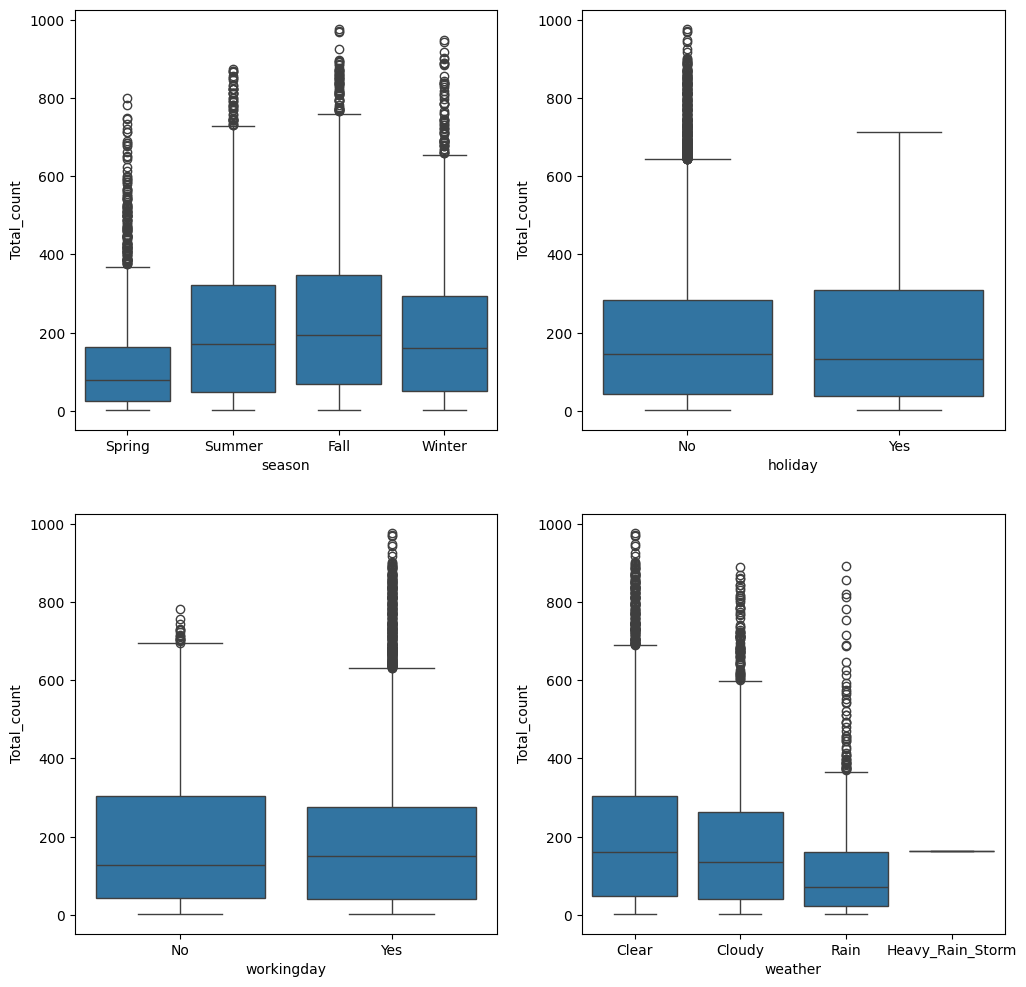

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)
sns.boxplot(x=df['season'],y = df['Total_count'])

plt.subplot(2,2,2)
sns.boxplot(x=df['holiday'],y = df['Total_count'])

plt.subplot(2,2,3)
sns.boxplot(x=df['workingday'],y = df['Total_count'])

plt.subplot(2,2,4)
sns.boxplot(x=df['weather'],y = df['Total_count'])

plt.show()

We can see outliers are present for every feature column and we have to figure out whether to keep these outliers or not or to treat them.



*   Outliers are given as number of bike rides per session/day and column Total_count can be treated as target column which will help in finding the revenue for the company.
*   These total counts could be higher because of some occasions, festivals. We cant remove or clip these outliers as these outliers are important and will increase revenue of the company and these outliers are not an valid error they are valid occurences. Hypothesis testing is not done on dataframe where outliers are not present because of this reason only. However removing outliers and clipping clipping is done after making a different copy of DF.

*   This case study primary goal is to help the management to improve the revenue and align with companies vision.







## Treatment of outliers

## Density curve

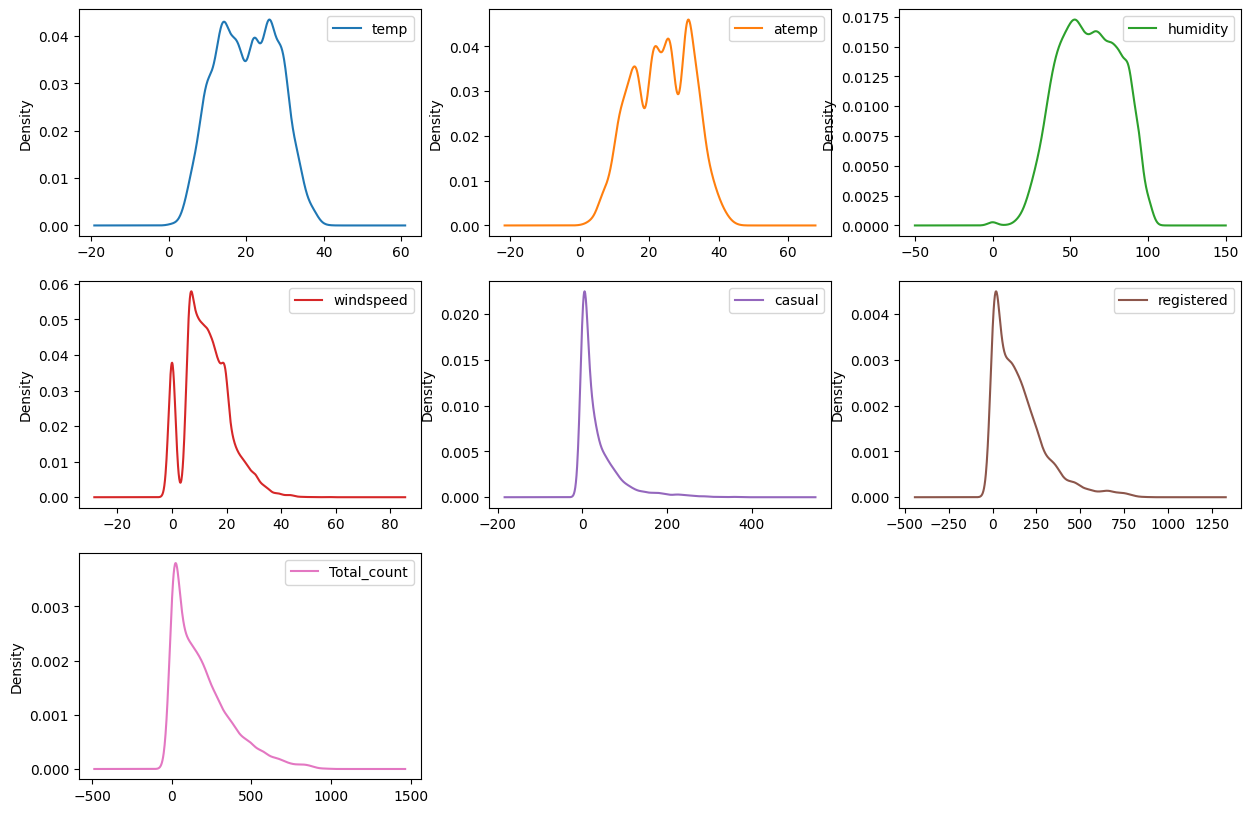

In [ ]:
plt.rcParams["figure.figsize"] = [15,10]
df_num.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

Insights

*   Columns such as casual,registered,totak_count are right skewed having outliers at the right tail end.
*   Whereas columns of temp,atemp,humidity are uniformly distributed






In [ ]:
Q1 = df_num.quantile(.25)
Q3 = df_num.quantile(.75)
IQR = Q3 - Q1
IQR

,0
temp,12.3000
atemp,14.3950
humidity,30.0000
windspeed,9.9964
casual,45.0000
registered,186.0000
Total_count,242.0000


In [ ]:
print('Q1:' ,Q1)
print('Q3:' ,Q3)


Q1: temp           13.9400
atemp          16.6650
humidity       47.0000
windspeed       7.0015
casual          4.0000
registered     36.0000
Total_count    42.0000
Name: 0.25, dtype: float64
Q3: temp            26.2400
atemp           31.0600
humidity        77.0000
windspeed       16.9979
casual          49.0000
registered     222.0000
Total_count    284.0000
Name: 0.75, dtype: float64


In [ ]:
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis =1).sum()

np.int64(1368)



*   1368 rows has outliers



In [ ]:
df[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Total_count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,Clear,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,No,Yes,Clear,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,Winter,No,Yes,Clear,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,No,Yes,Clear,13.94,17.425,61,6.0032,12,117,129


Insights

*   9518 are the rows where there are no outliers.





Columns such as casual,registered and total count are postive skewed i.e outliers are at the right tailend more we should clip them to 95th percentile

In [ ]:
df_clip = df.copy()
percentile = df_clip['Total_count'].quantile([0,.95]).values

df_clip['Total_count'] = np.clip(df_clip['Total_count'],percentile[0],percentile[1])

In [ ]:
percentile2 = df_clip['casual'].quantile([0,.95]).values
df_clip['casual'] = np.clip(df_clip['casual'],percentile2[0],percentile2[1])

In [ ]:
percentile3 = df_clip['registered'].quantile([0,.95]).values
df_clip['registered'] = np.clip(df_clip['registered'],percentile3[0],percentile3[1])

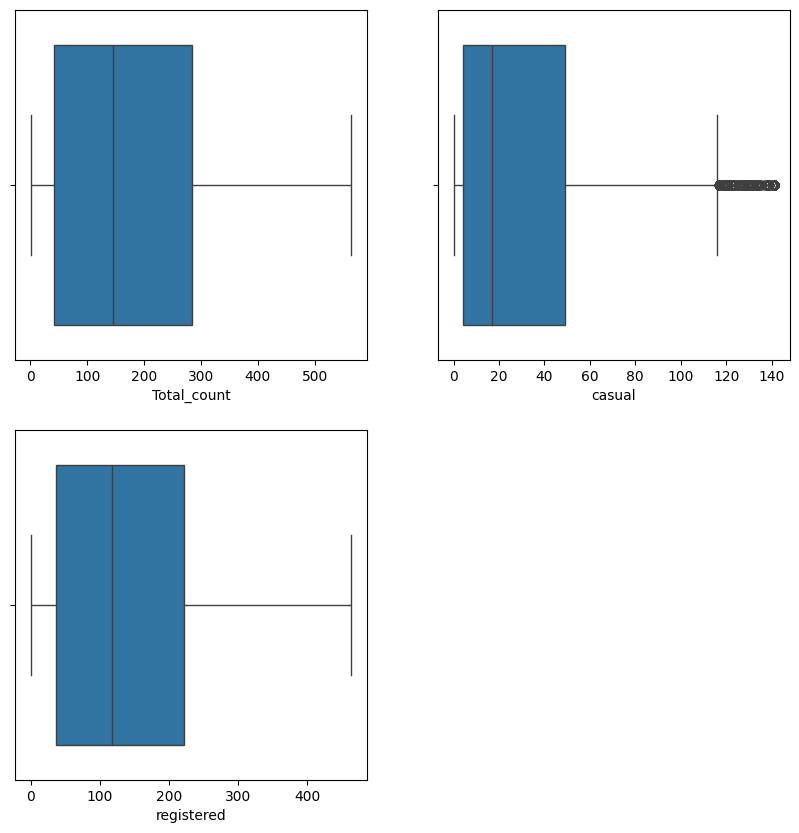

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.boxplot(x=df_clip['Total_count'])

plt.subplot(2,2,2)
sns.boxplot(x=df_clip['casual'])

plt.subplot(2,2,3)
sns.boxplot(x=df_clip['registered'])

plt.show()

Insights

*   Outliers are clipped to 95th percentile value.






# Skewnes values

In [ ]:
for i in df_num.columns:
  print(i,':',df_num[i].skew())

temp : 0.003690844422472008
atemp : -0.10255951346908665
humidity : -0.08633518364548581
windspeed : 0.5887665265853944
casual : 2.4957483979812567
registered : 1.5248045868182296
Total_count : 1.2420662117180776



# Kurtosis values

In [ ]:
for i in df_num.columns:
  print(i,':',df_num[i].kurt())

temp : -0.9145302637630794
atemp : -0.8500756471754651
humidity : -0.7598175375208864
windspeed : 0.6301328693364932
casual : 7.551629305632764
registered : 2.6260809999210672
Total_count : 1.3000929518398334


Insights

*   No. of outliers in casual is pretty high
*   Outliers in total_count and registered is also present
*   Casual column is more peaked i.e less data is spread out.









# Univariate Analysis

In [ ]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Total_count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


## Histogram

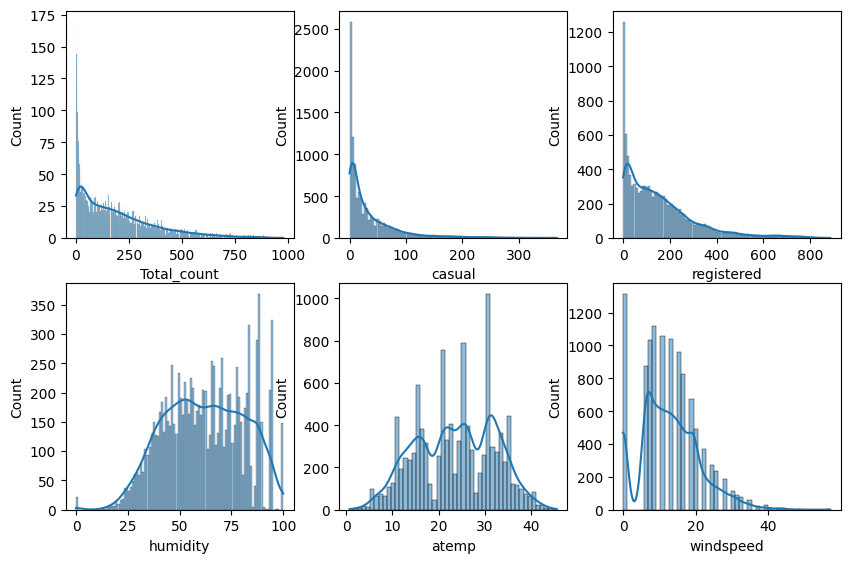

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3,3,1)
sns.histplot(df['Total_count'],kde = True,bins =1000)

plt.subplot(3,3,2)
sns.histplot(df['casual'],kde = True,bins =100)

plt.subplot(3,3,3)
sns.histplot(df['registered'],kde = True,bins =100)

plt.subplot(3,3,4)
sns.histplot(df['humidity'],kde = True,bins =100)

plt.subplot(3,3,5)
sns.histplot(df['atemp'],kde = True,bins =50)

plt.subplot(3,3,6)
sns.histplot(df['windspeed'],kde = True,bins =50)

plt.show()

Insights

*   Total_count,casual,registered column are right skewed having high no. of outliers.
*   Humidity and atemp graph are mostly uniformly distributed










## Count plot

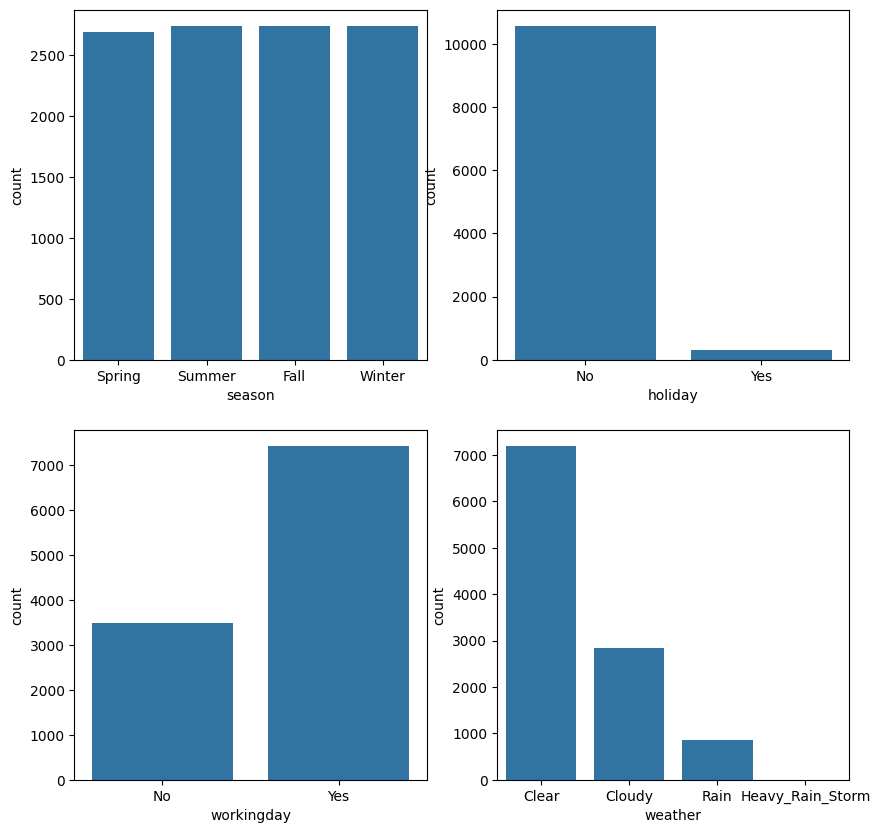

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.countplot(x=df['season'],data =df)

plt.subplot(2,2,2)
sns.countplot(x=df['holiday'],data =df)

plt.subplot(2,2,3)
sns.countplot(x=df['workingday'],data =df)

plt.subplot(2,2,4)
sns.countplot(x=df['weather'],data =df)

plt.show()

Insights

*   Count plot clearly says most of the days were having clear weather condition.
*   Almost equal number of different seasons.
*   Heavy rain storm occured only in 1 day.











# Relation between variables (Corelation)

In [ ]:
df_raw[['holiday','workingday','count','datetime','temp','atemp','humidity','windspeed','casual','registered','count']].corr()

,holiday,workingday,count,datetime,temp,atemp,humidity,windspeed,casual,registered,count
holiday,1.000000,-0.250491,-0.005393,0.010988,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.250491,1.000000,0.011594,-0.003658,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
count,-0.005393,0.011594,1.000000,0.310187,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000
datetime,0.010988,-0.003658,0.310187,1.000000,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
temp,0.000295,0.029966,0.394454,0.180986,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,-0.005215,0.024660,0.389784,0.181823,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.001929,-0.010880,-0.317371,0.032856,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,0.008409,0.013373,0.101369,-0.086888,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.043799,-0.319111,0.690414,0.172728,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,-0.020956,0.119460,0.970948,0.314879,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

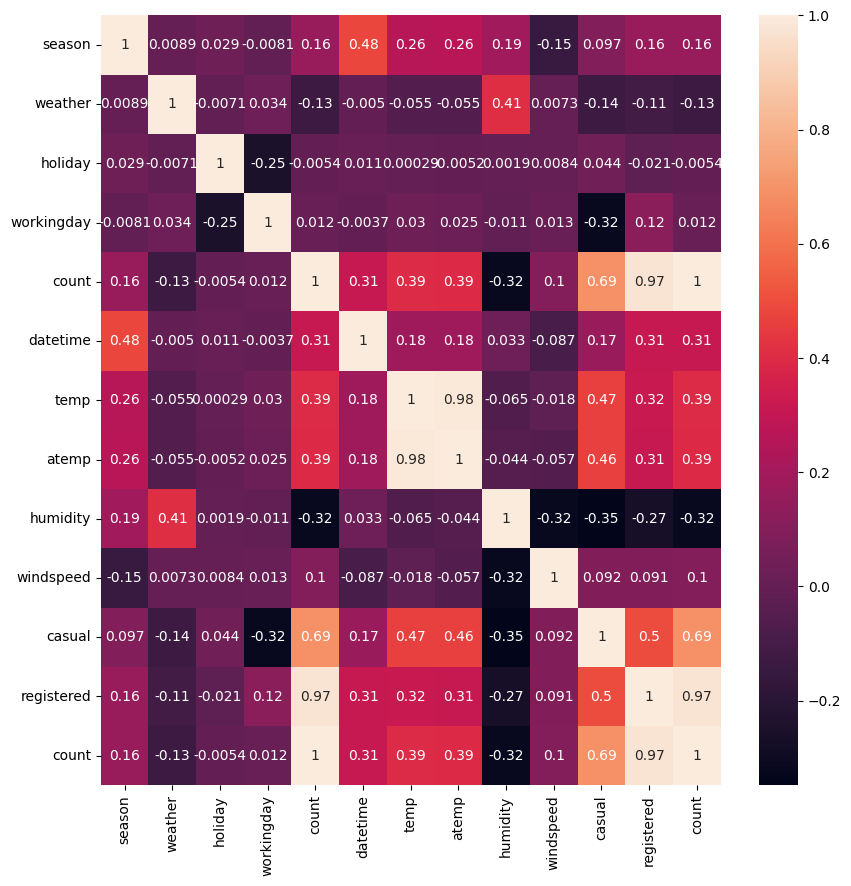

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_raw[['season','weather','holiday','workingday','count','datetime','temp','atemp','humidity','windspeed','casual','registered','count']].corr(),annot = True)

Insights

*   Casual,registered and count column are highly positively corelated.
*   atemp,total_count are slight postively corelated













## Scatter plot

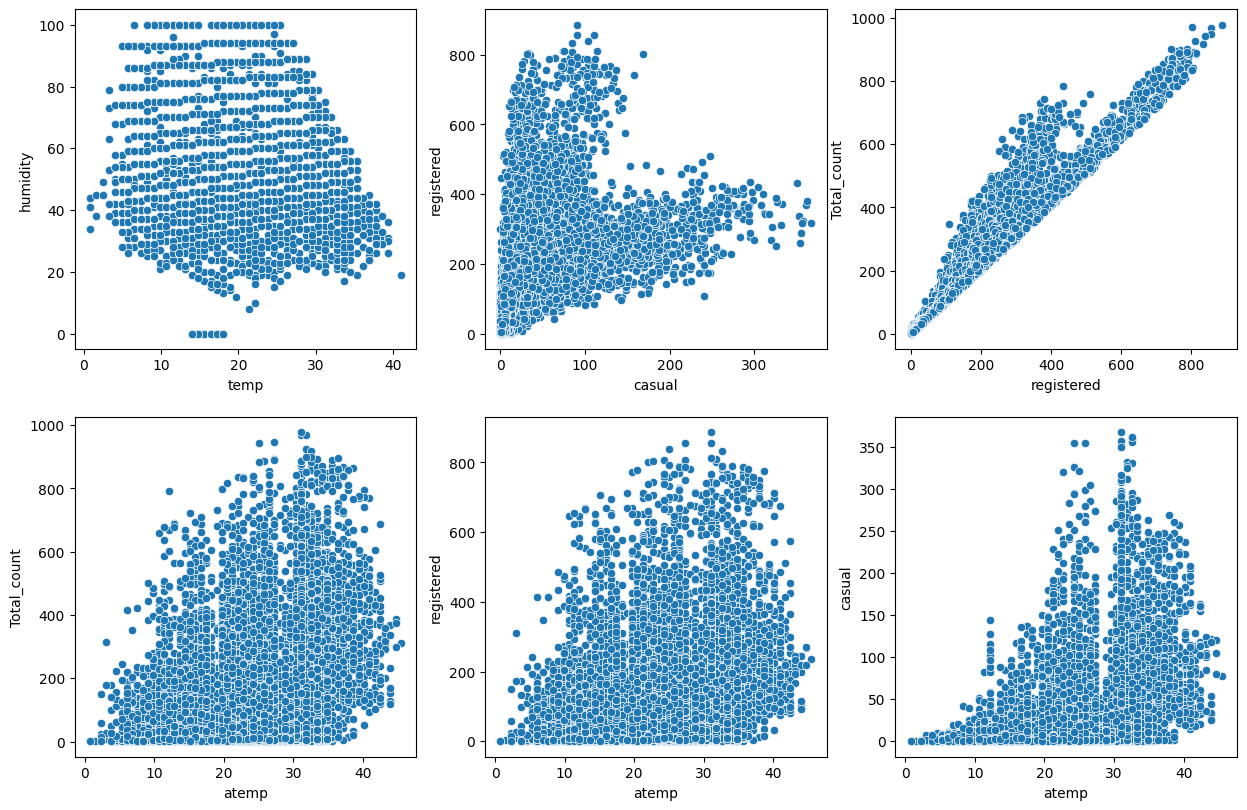

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
sns.scatterplot(data = df,x=df['temp'],y=df['humidity'])

plt.subplot(3,3,2)
sns.scatterplot(data = df,x=df['casual'],y=df['registered'])

plt.subplot(3,3,3)
sns.scatterplot(data = df,x=df['registered'],y=df['Total_count'])

plt.subplot(3,3,4)
sns.scatterplot(data = df,x=df['atemp'],y=df['Total_count'])

plt.subplot(3,3,5)
sns.scatterplot(data = df,x=df['atemp'],y=df['registered'])

plt.subplot(3,3,6)
sns.scatterplot(data = df,x=df['atemp'],y=df['casual'])

plt.show()

Insights

*   Total_count, registered columns are slighlt postiviely corelated with atem
*   Casual column is postively corelated with atem that means average casual customers of bike rides increases when atemp rises













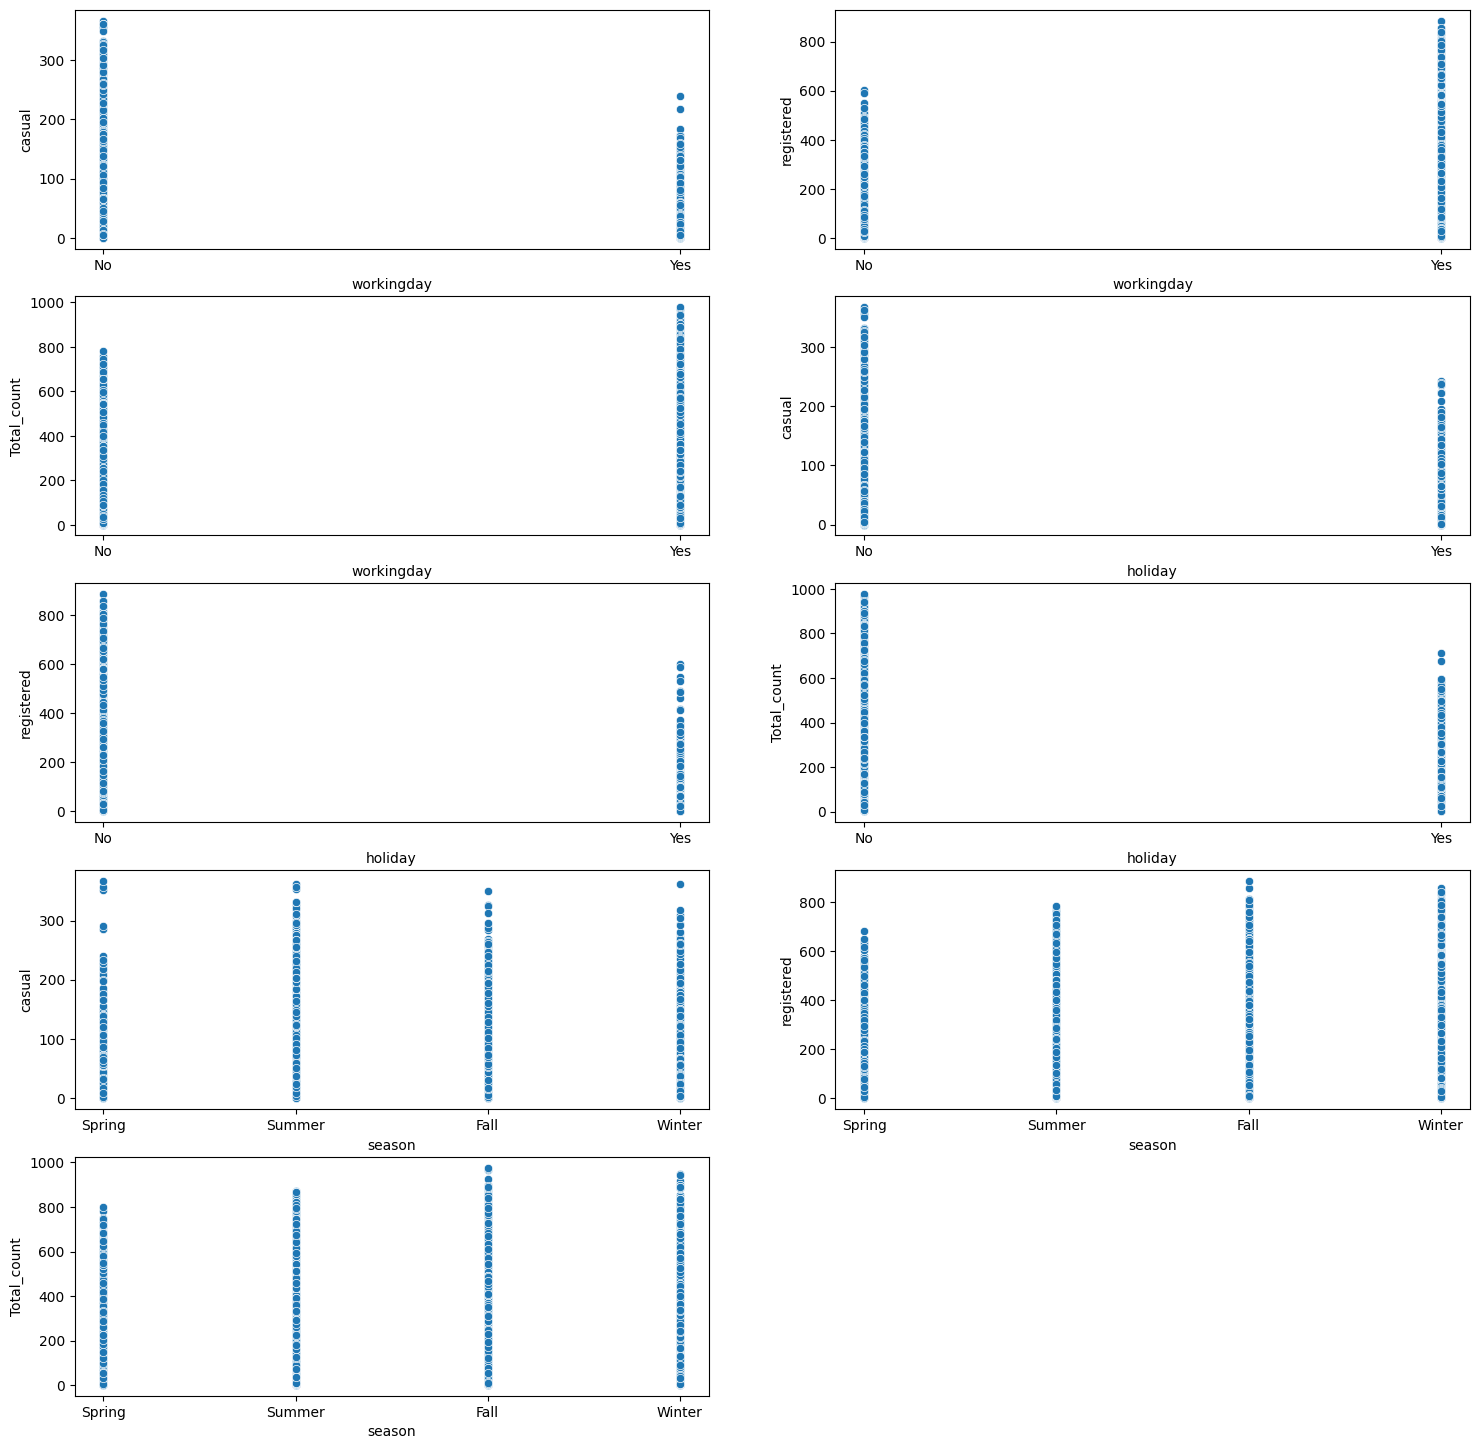

In [ ]:
plt.figure(figsize=(18, 18))

plt.subplot(5,2,1)
sns.scatterplot(data = df,x=df['workingday'],y=df['casual'])

plt.subplot(5,2,2)
sns.scatterplot(data = df,x=df['workingday'],y=df['registered'])

plt.subplot(5,2,3)
sns.scatterplot(data = df,x=df['workingday'],y=df['Total_count'])

plt.subplot(5,2,4)
sns.scatterplot(data = df,x=df['holiday'],y=df['casual'])

plt.subplot(5,2,5)
sns.scatterplot(data = df,x=df['holiday'],y=df['registered'])

plt.subplot(5,2,6)
sns.scatterplot(data = df,x=df['holiday'],y=df['Total_count'])

plt.subplot(5,2,7)
sns.scatterplot(data = df,x=df['season'],y=df['casual'])

plt.subplot(5,2,8)
sns.scatterplot(data = df,x=df['season'],y=df['registered'])

plt.subplot(5,2,9)
sns.scatterplot(data = df,x=df['season'],y=df['Total_count'])

plt.show()

Insights

*   Distribution of casual customer who are renting a bike prefers on weekend.
*   Number of bike renting done by registered customers is on working day more.
*   Total number of bike renting is more distributed on non-holidays.















# Bivariate Analysis

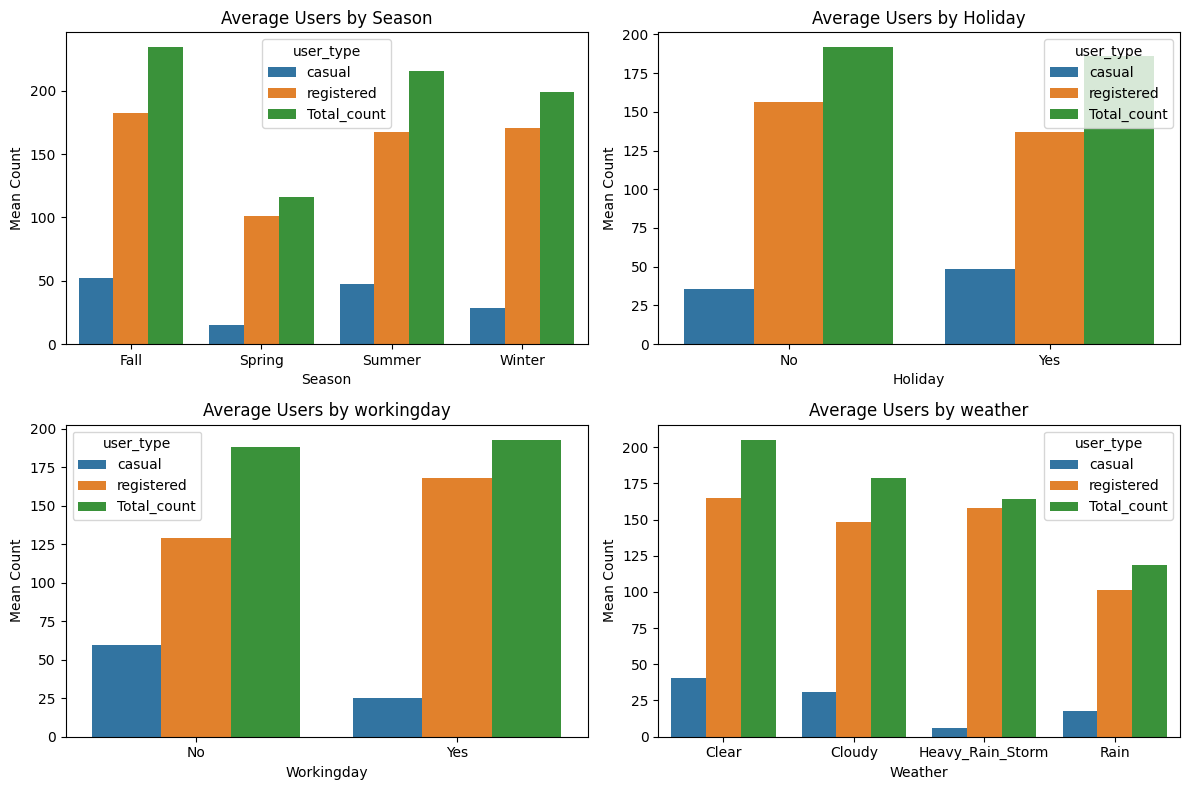

In [ ]:

fig,axes = plt.subplots(2,2,figsize=(12,8))

df_grouped_season = df.groupby(['season'])[['casual','registered','Total_count']].mean().reset_index()
df_melt_season = df_grouped_season.melt(id_vars = 'season',var_name='user_type',value_name='mean_count')
sns.barplot(data = df_melt_season,x = 'season',y = 'mean_count',hue = 'user_type',ax = axes[0,0])
axes[0,0].set_title('Average Users by Season')
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Mean Count')

df_grouped_holiday = df.groupby(['holiday'])[['casual','registered','Total_count']].mean().reset_index()
df_melt_holiday = df_grouped_holiday.melt(id_vars = 'holiday',var_name='user_type',value_name='mean_count')
sns.barplot(data = df_melt_holiday,x = 'holiday',y = 'mean_count',hue = 'user_type',ax = axes[0,1])
axes[0,1].set_title('Average Users by Holiday')
axes[0,1].set_xlabel('Holiday')
axes[0,1].set_ylabel('Mean Count')


df_grouped_workingday = df.groupby(['workingday'])[['casual','registered','Total_count']].mean().reset_index()
df_melt_workingday = df_grouped_workingday.melt(id_vars = 'workingday',var_name='user_type',value_name='mean_count')
sns.barplot(data = df_melt_workingday,x = 'workingday',y = 'mean_count',hue = 'user_type',ax = axes[1,0])
axes[1,0].set_title('Average Users by workingday')
axes[1,0].set_xlabel('Workingday')
axes[1,0].set_ylabel('Mean Count')

df_grouped_weather = df.groupby(['weather'])[['casual','registered','Total_count']].mean().reset_index()
df_melt_weather = df_grouped_weather.melt(id_vars = 'weather',var_name='user_type',value_name='mean_count')
sns.barplot(data = df_melt_weather,x = 'weather',y = 'mean_count',hue = 'user_type',ax = axes[1,1])
axes[1,1].set_title('Average Users by weather')
axes[1,1].set_xlabel('Weather')
axes[1,1].set_ylabel('Mean Count')

plt.tight_layout()
plt.show()

Insights

*   Average number of bike rents are more in fall season compare to other season for every user_type.
*   Average number of bike rents are more in working day for registered users where as it is lesser for casual users.
*   Average number of bike rents are more when sky is clear for every user type.














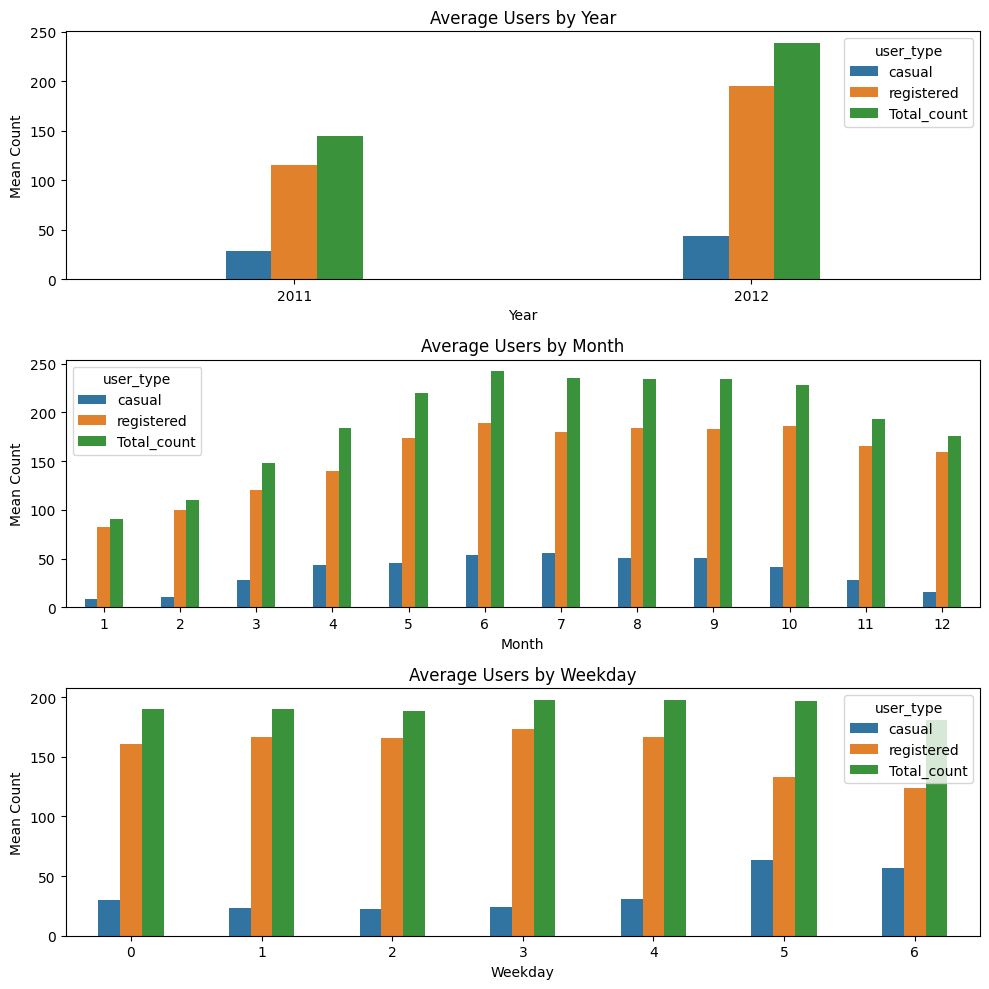

In [ ]:
#fig = plt.figure(figsize=(12,8))
fig,axes = plt.subplots(3,1,figsize=(10,10))

df_datetime_year = df.groupby(df['datetime'].dt.year)[['casual','registered','Total_count']].mean().reset_index()
df_datetime_year_melt = df_datetime_year.melt(id_vars = 'datetime',var_name='user_type',value_name='mean_count')
sns.barplot(data = df_datetime_year_melt,x = 'datetime',y = 'mean_count',hue = 'user_type',width=0.3,ax = axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean Count')
axes[0].set_title('Average Users by Year')

df_datetime_month = df.groupby(df['datetime'].dt.month)[['casual','registered','Total_count']].mean().reset_index()
df_datetime_month_melt = df_datetime_month.melt(id_vars = 'datetime',var_name='user_type',value_name='mean_count')
sns.barplot(data = df_datetime_month_melt,x = 'datetime',y = 'mean_count',hue = 'user_type',width=0.5,ax = axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Mean Count')
axes[1].set_title('Average Users by Month')

df_datetime_weekday = df.groupby(df['datetime'].dt.weekday)[['casual','registered','Total_count']].mean().reset_index()
df_datetime_weekday_melt = df_datetime_weekday.melt(id_vars = 'datetime',var_name = 'user_type',value_name = 'mean_count')
sns.barplot(data = df_datetime_weekday_melt,x = 'datetime',y = 'mean_count',hue = 'user_type',width=0.5,ax = axes[2])
axes[2].set_xlabel('Weekday')
axes[2].set_ylabel('Mean Count')
axes[2].set_title('Average Users by Weekday')

plt.tight_layout()
plt.show()

Insights

*   Average number of bike rents are increasing in 2012 every user_type.
*   Average number of bike rents are more in the month of may-oct compare other i.e customers prefer riding this in summer, fall season
*   Casual customers are more in weekend but where registered customers are less.

*   Average total number of bikes rented on weekend i.e 5th and 6th day are more higher.



















Text(0.5, 1.0, 'Average Users by Hour')

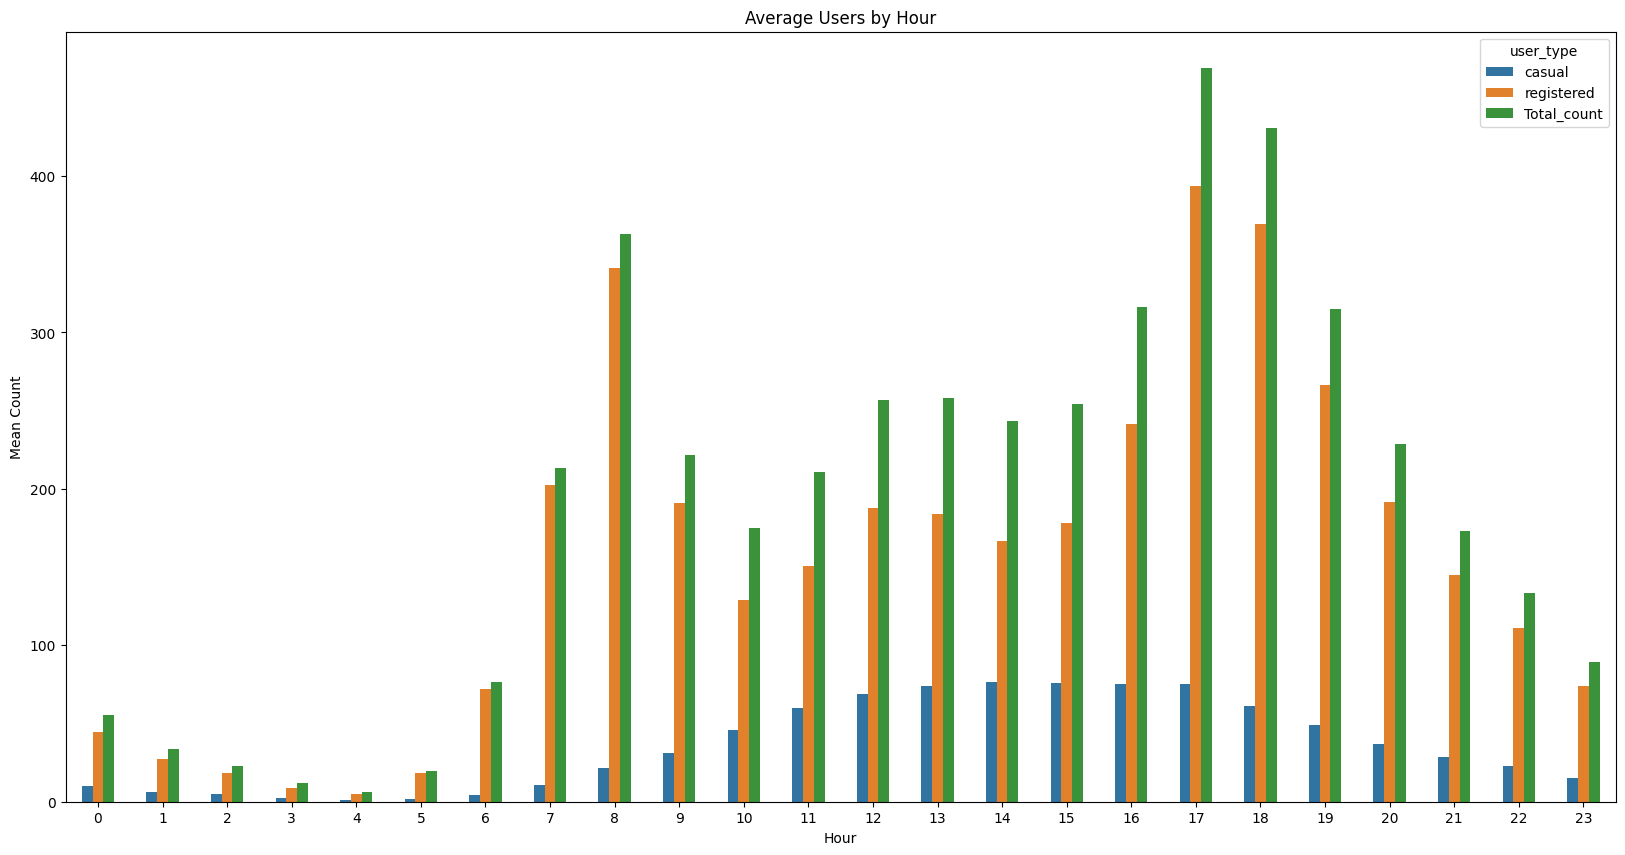

In [ ]:
plt.figure(figsize=(20, 10))
df_datetime_hour = df.groupby(df['datetime'].dt.hour)[['casual','registered','Total_count']].mean().reset_index()
df_datetime_hour_melt = df_datetime_hour.melt(id_vars = 'datetime',var_name = 'user_type',value_name = 'mean_count')
sns.barplot(data=df_datetime_hour_melt,x = 'datetime',y = 'mean_count',hue = 'user_type',width=0.5)
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.title('Average Users by Hour')


Insights

*   Average number of bike rents are more around 5pm,6pm during evening.
*   Average number of bike rents are more around 8am in the morning.
*   During midnight negligible number of bike rented.
*   Casual customers are using more bikes int he evening only
















In [ ]:
pd.DataFrame(df.groupby(['workingday'])['Total_count'].describe())

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
No,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
Yes,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


Insights

*   Statistical mean of bike rented are almost same for working day and non working day














In [ ]:
pd.DataFrame(df.groupby(['season'])['Total_count'].describe())

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
Spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
Summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
Winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


Insights

*   Statistical mean of bike rented are more in fall season compare to other but we will do hypothesis testing on this to solidify our evidence.

*   Demand of bike is lowest in spring time.

















In [ ]:
pd.DataFrame(df.groupby(['weather'])['Total_count'].describe())

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Clear,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
Cloudy,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
Heavy_Rain_Storm,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0
Rain,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


Insights

*   Avg number of bike rented are more when weather is clear compare to other but we will do hypothesis testing on this to solidify our evidence.

















In [ ]:
pd.DataFrame(df.groupby(['holiday'])['Total_count'].describe())

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
No,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
Yes,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


Insights

*   Avg number of bike rented are almost same on holiday and non holday.

















In [ ]:
pd.DataFrame(df.groupby([df['datetime'].dt.year])['Total_count'].describe())

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
2011,5422.0,144.223349,133.312123,1.0,32.0,111.0,210.0,638.0
2012,5464.0,238.560944,208.114003,1.0,59.0,199.0,354.0,977.0


In [ ]:
pd.DataFrame(df.groupby([df['datetime'].dt.year])['casual'].describe())

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
2011,5422.0,28.73792,39.554419,0.0,3.0,13.0,38.0,272.0
2012,5464.0,43.25000,57.584101,0.0,5.0,20.0,61.0,367.0


In [ ]:
pd.DataFrame(df.groupby([df['datetime'].dt.year])['registered'].describe())

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
2011,5422.0,115.485430,108.847868,0.0,27.0,91.0,168.0,567.0
2012,5464.0,195.310944,174.709050,1.0,51.0,161.0,281.0,886.0


To test all these claims mentioned we will solidify our evidence by using hypothesis testing.

# Hypothesis Testing

In [ ]:
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import chi2_contingency

---


### Q-> 1 - Is the average number of bikes rented more on non working day compare to working day?
---



*   H0 is null hypothesis
*   Ha is alternate hypothesis



H0:  The demand of bikes on **NON WORKING DAY** is lesser or similar to the demand of bikes on **WORKING DAY**

Ha: The demand of bikes on **NON WORKING DAY** is more than the demand of bikes on **WORKING DAY**

Let μ1 and μ2 be the average no. of bikes rented on **WORKING DAY** and **NON WORKING DAY** respectively.

Mathematically, the above formulated hypothesis can be written as:

H0:μ1>=μ2

Ha:μ1<μ2

This is an example of two sample Ttest as population mean and deviation is unknown.

In [ ]:
df.groupby(['workingday'])['Total_count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
No,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
Yes,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
def result(p_value,alpha):
  if p_value > alpha:
    print('Accept Null Hypothesis')
  else:
    print('Reject Null Hypothesis')

In [ ]:
alpha = 0.05

Sample size of both the variable are different, so for accuracy in test we have to take same sample size.

In [ ]:
working_day = df[df['workingday'] == 'Yes']['Total_count'].sample(3000)
non_working_day = df[df['workingday'] == 'No']['Total_count'].sample(3000)

To check whether for both the group variance is different or not , we will do Levene test

We will test the null hypothesis

>$H_0$: All the count variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
stat, p_value = levene(working_day, non_working_day)
print(result(p_value,.05),'The p-value is : ', p_value,)

Accept Null Hypothesis
None The p-value is :  0.44556677874680717


In [ ]:
# variance difference is not high we can work on two sample ttest

In [ ]:
test_stat, p_value = ttest_ind(working_day, non_working_day , alternative='less')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.9580346396474685
Accept Null Hypothesis


Observation: Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the demand of bikes on **Non working day** is < or = to the demand of bikes on **Working day**

*   There is no significant difference in average no. of rented bikes for working day and non working day




---


### Q-> 2 -  Is the demand of bike rides significantly more on holidays compare to regular days? ?
---

H0:  The demand of bikes on **HOLIDAY** is lesser or similar to the demand of bikes on **REGULAR DAYS**

Ha: The demand of bikes on **HOLIDAY** is more than the demand of bikes on **REGULAR DAYS**

Let **μ1** and **μ2** be the average no. of bikes rented on **REGULAR DAYS** and **HOLIDAY** respectively.
Mathematically, the above formulated hypothesis can be written as:

H0:μ1>=μ2

Ha:μ1<μ2

In [ ]:
df.groupby(['holiday'])['Total_count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
No,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
Yes,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


Sample size of both the variable are different, so for accuracy in test we have to take same sample size.

In [ ]:
holiday = df[df['holiday'] == 'Yes']['Total_count'].sample(250)
regular = df[df['holiday'] == 'No']['Total_count'].sample(250)

To check whether for both the group variance is different or not , we will do Levene test

We will test the null hypothesis

>$H_0$: All the count variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
# checking variance of both
stat, p_value = levene(holiday, regular)
print('The p-value is : ', p_value)
result(p_value,alpha)

The p-value is :  0.7164554220399202
Accept Null Hypothesis


In [ ]:
# variance difference is not that much we can work on two sample ttest

In [ ]:
test_stat, p_value = ttest_ind( regular,holiday , alternative='less')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.6698159123425527
Accept Null Hypothesis


Observation: Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, dont we have enough statistical evidence to say that the demand of bikes on **HOLIDAYS** is >  demand of bikes on **REGULAR DAYS**

### Q-> 2a - Is the demand of bike rides significantly more on  regular days compare to holiday?

H0:  Avg no. of bikes rented is same on regular and holidays

Ha: Avg no. of bikes rented is more on regular days compare to holiday


In [ ]:
test_stat, p_value = ttest_ind(regular,holiday, alternative='greater')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.33018408765744744
Accept Null Hypothesis


Observation:There is no significant evidence that avg no. of bikes rented is more on regular days compare to holiday.




---


### Q-> 3 - Is the weather condition impacts the demand of bike ?
---

H0:  The demand of bikes is not impacted by **WEATHER**

Ha: The demand of bikes is impacted by **WEATHER**


In [ ]:
df.groupby(['weather'])['Total_count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Clear,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
Cloudy,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
Heavy_Rain_Storm,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0
Rain,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


Sample size of both the variable are different, so for accuracy in test we have to take same sample size.

In [ ]:
Clear = df[df['weather'] == 'Clear']['Total_count'].sample(750)
Cloudy = df[df['weather'] == 'Cloudy']['Total_count'].sample(750)
Rain = df[df['weather'] == 'Rain']['Total_count'].sample(750)

This is a problem, concerning three independent population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population variance of the groups are all equal.

Now, we will be using the following statistical tests to check the normality and euality of variance of the data set -

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

H0:  Total_count follows normal distribution

Ha: Total_count does not follows normal distribution


In [ ]:
#Assumptions 1
test, p_value = shapiro(df['Total_count'].sample(4999))
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  1.0725563628727376e-52
Reject Null Hypothesis


Observation:We reject null hypothesis, data is not normal.




In [ ]:
df['Total_count'].skew()

np.float64(1.2420662117180776)

In [ ]:
df['Total_count'].kurt()

np.float64(1.3000929518398334)

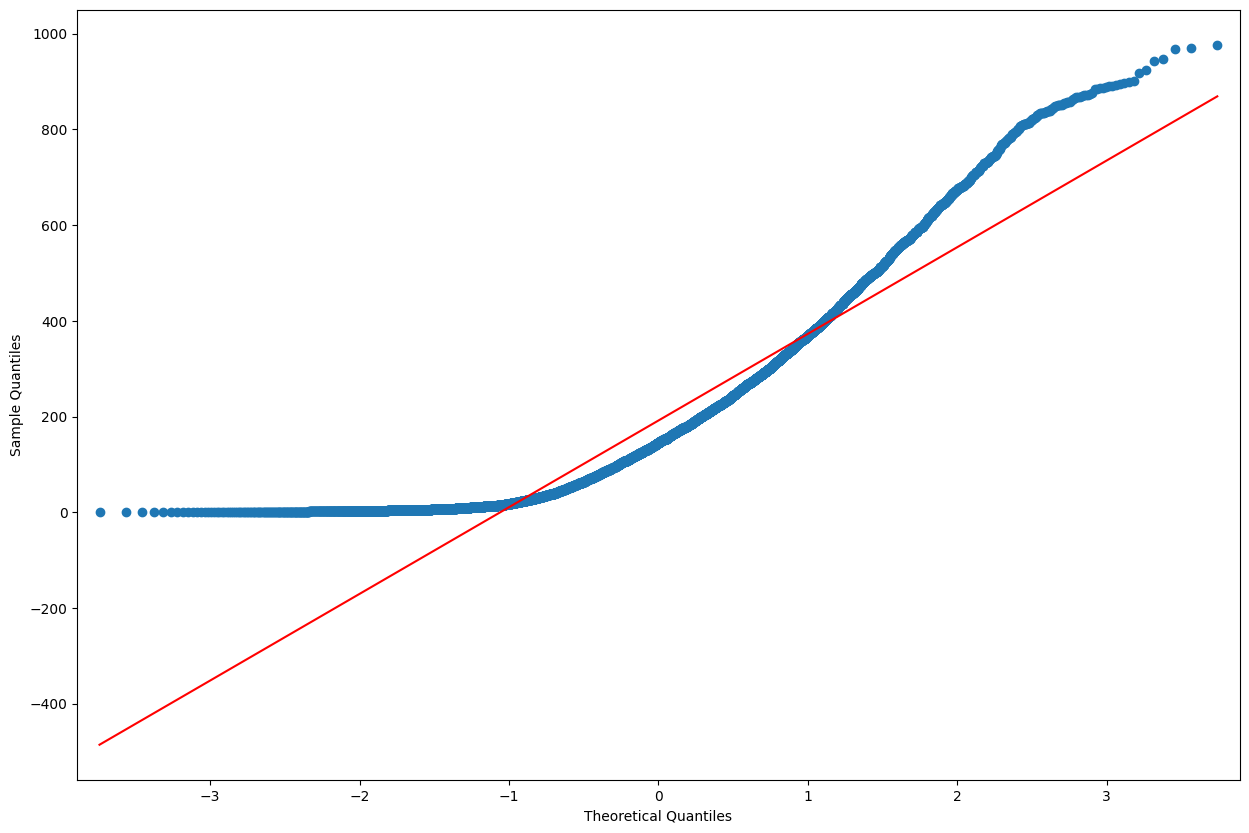

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['Total_count'], line="s")
plt.show()

INSIGHTS
*   SKEWNESS OF 1.24 can prove that distribution is not normal and it is postive skewed
*   QQ plot also says distribution is not normal
*   Histogram of Total count column shown before was also right  skewed.








#### Levene test

To check whether for both the group variance is different or not , we will do Levene test


*   H0: Variances are equal among groups(Clear,cloudy,Rain)
*   Ha: Variances are not equal among groups


In [ ]:
#Assumption 2: Homogeneity of Variance
stat, p_value = levene(Clear, Cloudy, Rain)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  5.641228113822285e-18
Reject Null Hypothesis



*   Assumptions of anova  fails for the weather category we will check with kruskal wallis test.




#### Kruskal WaLLis Test

In [ ]:
from scipy.stats import kruskal
stat, p_value = kruskal(Clear, Cloudy, Rain)

print("test statistic:",stat)
print("p_value:",p_value)
result(p_value, alpha)

test statistic: 103.71392415468021
p_value: 3.011670961748692e-23
Reject Null Hypothesis


#### ANOVA test

In [ ]:
f_stats, p_value  = f_oneway(Clear,Cloudy,Rain)
print("p_value is :",p_value)
result(p_value, alpha)

p_value is : 9.576887178008343e-23
Reject Null Hypothesis


Observation: Since the p-value is lesser than the 5% significance level for both Kruskal wallis test and anova test, we will reject the null hypothesis. Hence, we have enough statistical evidence to say that the demand of bikes is impacted by weather

---


### Q-> 3a - Is the "clear" weather condition generates more demand in bikes than "cloudy" weather condition?
---

H0:  Avg no. of bikes rented is same in weather condition of **clear** and **cloudy**

Ha: Avg no. of bikes rented is more in **clear** weather condition than **cloudy**



In [ ]:
test_stat, p_value = ttest_ind(Clear, Cloudy, alternative='greater')
print("p_value is :",p_value)
result(p_value, alpha)

p_value is : 0.03340071399969007
Reject Null Hypothesis


Observation:There is significant evidence to say demand of bike is more in clear condition of weather.

---


### Q-> 3b - In the "rain" weather condition demand of bikes drops significant  than "cloudy" condition?
---

H0:  Avg no. of bikes rented is same in weather condition of **rain** and **cloudy**

Ha: Avg no. of bikes rented is less in **rain** weather condition than **cloudy**



In [ ]:
test_stat, p_value = ttest_ind(Rain,Cloudy, alternative='less')
print("p_value is :",p_value)
result(p_value, alpha)

p_value is : 3.6076211382125567e-16
Reject Null Hypothesis


Observation:There is significant eveidence to say demand of bike is less in rain condition of weather compare to cloudy.

---


### Q-> 4 - Is the demand of bicycles on rent are same for different Seasons? ?
---

In [ ]:
df.groupby(['season'])['Total_count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
Spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
Summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
Winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


H0:  The demand of bikes is not impacted by **SEASON** i.e average no. of bike rented is not impacted by season

Ha: The demand of bikes is impacted by **SEASON** i.e average no. of bike rented is impacted by season


Sample size of both the variable are different, so for accuracy in test we have to take same sample size.

In [ ]:
Fall = df[df['season'] == 'Fall']['Total_count'].sample(1500)
Spring = df[df['season'] == 'Spring']['Total_count'].sample(1500)
Summer = df[df['season'] == 'Summer']['Total_count'].sample(1500)
Winter = df[df['season'] == 'Winter']['Total_count'].sample(1500)

This is a problem, concerning three independent population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population variance of the groups are all equal.

Now, we will be using the following statistical tests to check the normality and euality of variance of the data set -

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

H0:  Total_count follows normal distribution

Ha: Total_count does not follows normal distribution


In [ ]:
#Assumptions 1
test, p_value = shapiro(df['Total_count'].sample(4999))
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  8.363243688240454e-53
Reject Null Hypothesis


In [ ]:
df['Total_count'].skew()

np.float64(1.2420662117180776)

In [ ]:
df['Total_count'].kurt()

np.float64(1.3000929518398334)

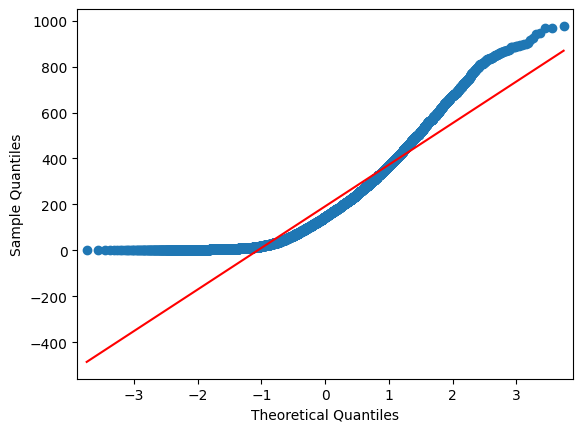

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['Total_count'], line="s")
plt.show()

INSIGHTS
*   SKEWNESS OF 1.24 can prove that distribution is not normal and it is postive skewed
*   QQ plot also says distribution is not normal
*   Histogram of Total_count column shown before was also right skewed.








#### Levene test

To check whether for both the group variance is different or not , we will do Levene test


*   H0: Variances are equal among groups(Fall,Spring,Winter,Summer)
*   Ha: Variances are not equal among groups


In [ ]:
#Assumption 2: Homogeneity of Variance
stat, p_value = levene(Fall, Spring, Summer,Winter)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  1.9621950326986815e-62
Reject Null Hypothesis


Since variance of all the groups are different and distribution is not normal we will go for kruskal wallis test


#### Kruskal WaLLis Test

In [ ]:
from scipy.stats import kruskal
stat, p_value = kruskal(Fall,Spring,Summer,Winter)

print("test statistic:",stat)
print("p_value:",p_value)
result(p_value, alpha)

test statistic: 383.6518757167206
p_value: 7.692899079435081e-83
Reject Null Hypothesis


#### One way ANOVA test

In [ ]:
f_stats, p_value  = f_oneway(Fall,Spring,Summer,Winter)
print("p_value is :",p_value)
result(p_value, alpha)

p_value is : 4.1056040913058556e-81
Reject Null Hypothesis


Observation: Since the p-value is lesser than the 5% significance level for both Anova and kruskal wallis test, we will reject the null hypothesis. Hence, we have enough statistical evidence to say that the demand of bikes is impacted by season.

---


### Q-> 4a - Is the demand of bicycles on rent are more on fall season compare to winter? ?
---

H0:  Avg no. of bikes rented are same in season  **fall** and **winter**

Ha: Avg no. of bikes rented are more in **fall** season compare to **winter**

In [ ]:
test_stat, p_value = ttest_ind(Fall,Winter, alternative='greater')
print("p_value is :",p_value)
result(p_value, alpha)

p_value is : 3.859669922300468e-10
Reject Null Hypothesis


Observation:There is significant evidence to say demand of bikes are more in Fall compare to Winter.

---


### Q-> 4b - Is the demand of bicycles on rent are more on fall season compare to summer? ?
---

H0:  Avg no. of bikes rented are same in season  **fall** and **summer**

Ha: Avg no. of bikes rented are more in **fall** season compare to **summer**

In [ ]:
test_stat, p_value = ttest_ind(Fall,Summer, alternative='greater')
print("p_value is :",p_value)
result(p_value, alpha)

p_value is : 0.0009982109202902772
Reject Null Hypothesis


Observation:There is significant eveidence to say demand of bikes are more in Fall compare to summer.

---


### Q-> 5 -  Are the weather conditions significantly different during different seasons?
---

H0:  **Weather** conditions are independent of **season**

Ha: **Weather** conditions depend on **season**


In [ ]:
df = df[df['weather'] != 'Heavy_Rain_Storm']

In [ ]:
# Create a contingency table with aggregation of Total_count
contingency_tab2 = pd.crosstab(df['season'], df['weather'])
print(contingency_tab2)


weather  Clear  Cloudy  Rain
season                      
Fall      1930     604   199
Spring    1759     715   211
Summer    1801     708   224
Winter    1702     807   225


In [ ]:
chi2, pval, dof, exp_freq = chi2_contingency(contingency_tab2)
print('Chi-square Statistic: {} \n P-value: {} \n Degree of Freedom: {} \n Expected Frequencies: {}'.format(chi2, pval, dof, np.round(exp_freq,2)))


Chi-square Statistic: 46.10145731073249 
 P-value: 2.8260014509929343e-08 
 Degree of Freedom: 6 
 Expected Frequencies: [[1805.76  711.56  215.68]
 [1774.05  699.06  211.89]
 [1805.76  711.56  215.68]
 [1806.42  711.82  215.76]]


Observation:There is significant eveidence to say weather conditions depend on season

# Insights and Recommendations

#### **EDA based insights -**

1. Total number of registered customers who rents bike are more than casual.
2. Dataset is given from January 2011 to December 2012.
3. Total no. bike rented on Fall season are significantly more compared to other season.
4. Casual customers renting a bike are more on weekend.
5. Avg number of bikes rented by registered users are more on working day.
6. Distribution is right skewed distribution i.e. outliers are in the right tail end; this means there are occurrence of event where number of bikes rented have gone up.
7. Neither missing values, nor duplicate rows were found.
8. Temp and atemp columns were found to be positively corelated.
9. Casual and registered customers are positively corelated with atem column that means bike rides by these customers increases when atmospheric temp rises.
10. Total count,casual,registered column distribution are heavily right skewed.
11. Average number of bikes rented on holiday and non holiday are not having any different.

#### **Insights from hypothesis testing -**

1. The no. of bikes rented on weekdays is comparatively higher than on weekends.
2. The no. of bikes rented on regular (non-holiday) is almost same compared to holidays.
3. The demand of bicycles on rent are impacted by weather condition.
4. The no. of bikes rented more when weather was clear.
5. The no. of bikes rented more during Fall season compared to winter and summer.
6. Weather conditions are significantly different during different seasons.


#### **General recommendations -**

* The demand of bikes on rent are usually higher during weekdays we can infer that bikes are using by working professional i.e. gig workers, office goers, delivery agents so company should target do customer segmentation based on this to improve their revenue.
* Company should do ad campaign focusing how easier a transport becomes after using bikes.
* We saw clear indication that bike renting gone up when the weather is clear that means company should increase the number of bikes at the station to cop up the demand.
* Company should repair the unused bikes at station during spring because demand is very low at that time.
* Company should focus on making a station near mall, food plaza places, iconic places where people spend more time on weekend so that more casual customers increase, and also ample amount of bike should be available in those spots in weekend.
* Company should increase bike stocks in the weekend as there is strong demand.

We recommend the company to maintain the bike stocks accordingly.
